# Data Visualization & Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import os, sys

sys.path.append('./hazard_prediction/')
from dataloader import HazardAudicor10sLoader
from dataloader import HazardBigExamLoader

%matplotlib inline

         when using: `python -m better_exceptions'. Otherwise, only code
         loaded from files will be inspected!


In [3]:
def plot_pie(title, n_subject_with_event, n_subject_without_event):
    plt.figure(figsize=(20, 10))
    plt.title(title, fontsize=20)
    plt.pie([n_subject_with_event, n_subject_without_event], labels=['# of subjects with events', '# of subjects without events'], autopct='%1.1f%%', textprops={'fontsize': 14})
    plt.show()
    
def plot_hist(title, survival_times):
    plt.figure(figsize=(20, 10))
    plt.title(title)
    counts, bins, _ = plt.hist(survival_times, bins=20, rwidth=0.9)
    plt.xticks(bins, bins.astype(int))

    plt.xlabel('Event Times (days)')
    plt.ylabel('# of Signals')
    plt.show()

## Big Exam

In [4]:
class HazardBigExamConfig():
    def __init__(self):
        self.big_exam_ekg_channels = [0, 1, 2, 3, 4, 5, 6, 7]
        self.big_exam_hs_channels = [8, 9]
        self.big_exam_only_train = False
        self.n_ekg_channels = 8
        self.n_hs_channels = 2
        self.sampling_rate = 1000
        self.downsample = 'direct'
        self.with_normal_subjects = True
        self.events = ['ADHF', 'Mortality', 'MI', 'Stroke', 'CVD']

loader = HazardBigExamLoader(HazardBigExamConfig())

In [5]:
print('Number of normal subjects:', np.unique(loader.load_subject_id(is_normal=True)).shape[0])
print('Number of normal subjects:', loader.load_normal_X().shape[0])

print('Number of abnormal subjects:', np.unique(loader.load_subject_id(is_normal=False)).shape[0])
print('Number of abnormal signals:', loader.load_abnormal_X().shape[0])

Number of normal subjects: 601
Number of normal subjects: 601
Number of abnormal subjects: 226
Number of abnormal signals: 795


In [6]:
longest_event_time = 0
y = loader.load_abnormal_y()

for i in range(5):
    longest_event_time = max(longest_event_time, 
                            y[y[:, i, 0] == 1, i, 1].max())
print('longest event time: {} days'.format(longest_event_time.astype(int)))

longest event time: 2048 days


## Audicor_10s

In [7]:
# load data
normal_filenames = np.load('./data/audicor_10s/normal_filenames.npy')
abnormal_filenames = np.load('./data/audicor_10s/abnormal_filenames.npy')

In [8]:
print('Number of normal signals:', normal_filenames.shape[0])
print('Number of abnormal signals:', abnormal_filenames.shape[0])

Number of normal signals: 340
Number of abnormal signals: 776


In [9]:
abnormal_subject_ids = np.vectorize(lambda s: (s.split('/')[-1]).split('_')[0])(abnormal_filenames)
print('Number of abnormal subjects:', np.unique(abnormal_subject_ids).shape[0])

Number of abnormal subjects: 211


In [10]:
class HazardAudicor10sConfig():
    def __init__(self):
        self.audicor_10s_ekg_channels = [0]
        self.audicor_10s_hs_channels = [1]
        self.audicor_10s_only_train = False
        self.n_ekg_channels = 1
        self.n_hs_channels = 1
        self.sampling_rate = 500
        self.downsample = 'direct'
        self.with_normal_subjects = True
        self.events = ['ADHF', 'Mortality']

loader = HazardAudicor10sLoader(HazardAudicor10sConfig())

In [11]:
y = loader.load_abnormal_y()
y.shape

(776, 2, 2)

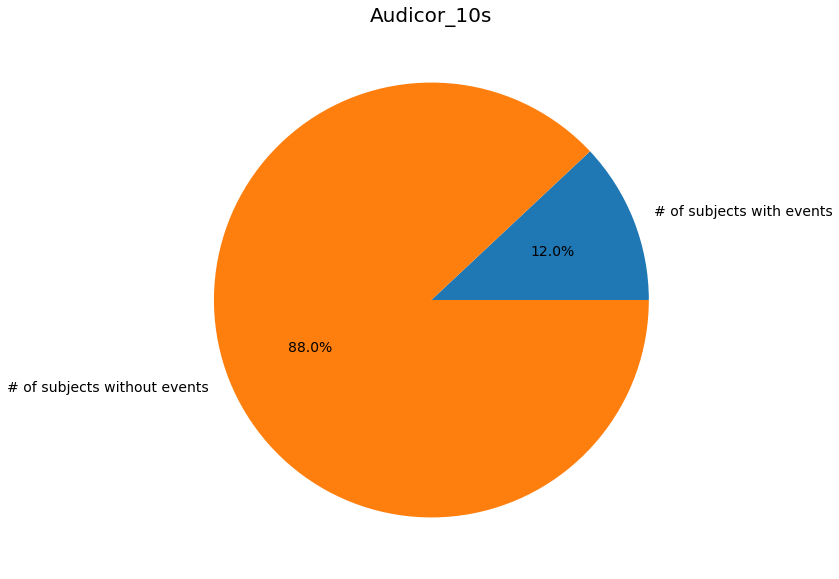

In [12]:
n_subject_with_event = (y[:, 0, 0] == 1).sum() + (y[:, 1, 0] == 1).sum()
n_subject_without_event = y.shape[0] - n_subject_with_event
plot_pie('Audicor_10s', 
            n_subject_with_event,
            n_subject_without_event)

In [13]:
print('longest event time:', int(max(y[y[:, 0, 0] == 1, 0, 1].max(), y[y[:, 1, 0] == 1, 1, 1].max())), 'days')

longest event time: 322 days


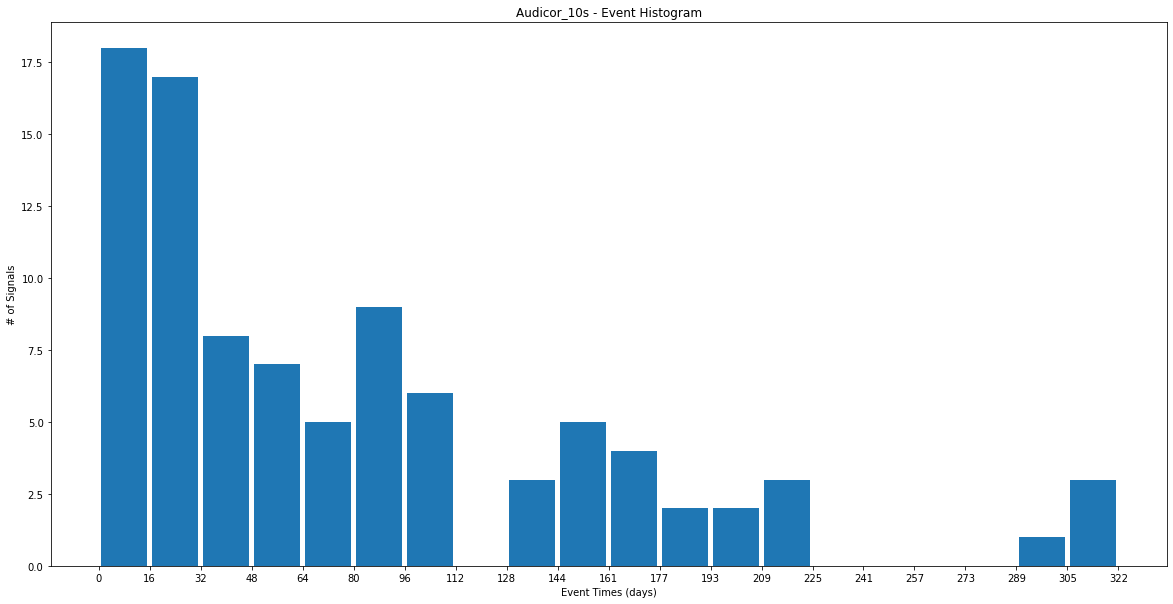

In [14]:
ADHF_survival_times = y[y[:, 0, 0] == 1, 0, 1]
Mortality_survival_times = y[y[:, 1, 0] == 1, 1, 1]

total_survival_times = np.append(ADHF_survival_times, Mortality_survival_times)
plot_hist('Audicor_10s - Event Histogram', total_survival_times)

### ADHF

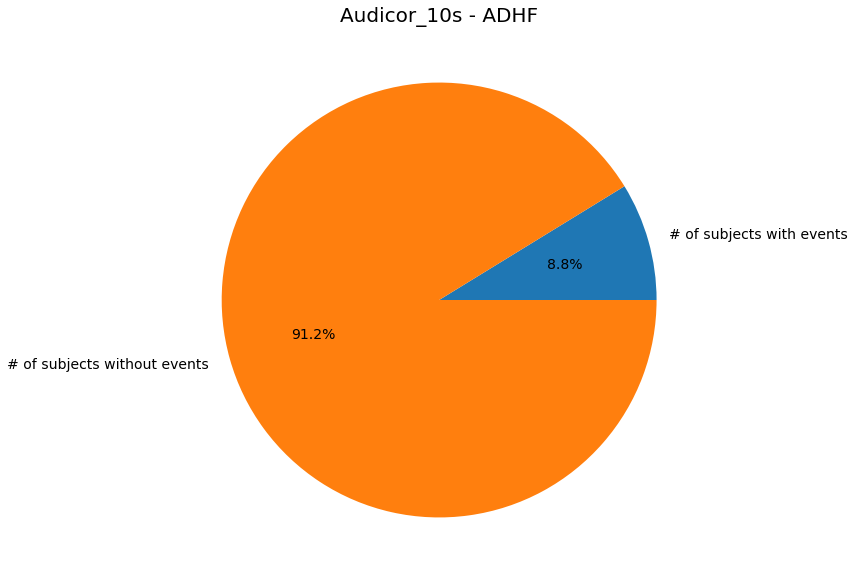

In [15]:
n_subject_with_event = (y[:, 0, 0] == 1).sum()
n_subject_without_event = y.shape[0] - n_subject_with_event
plot_pie('Audicor_10s - ADHF', 
            n_subject_with_event,
            n_subject_without_event)

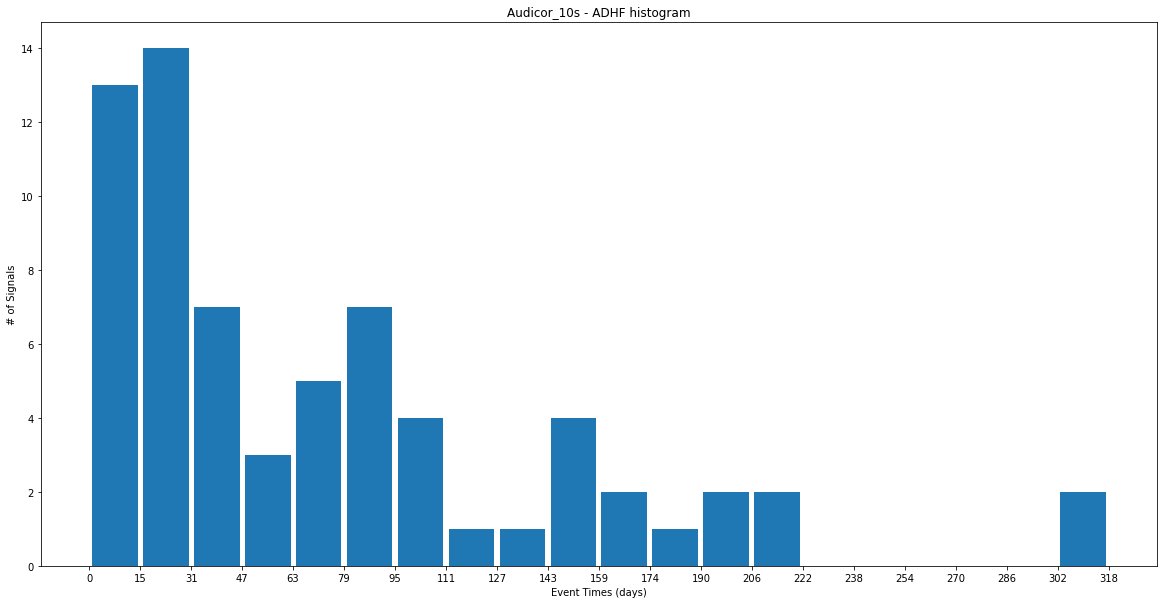

In [16]:
plot_hist('Audicor_10s - ADHF histogram', ADHF_survival_times)

### Mortality

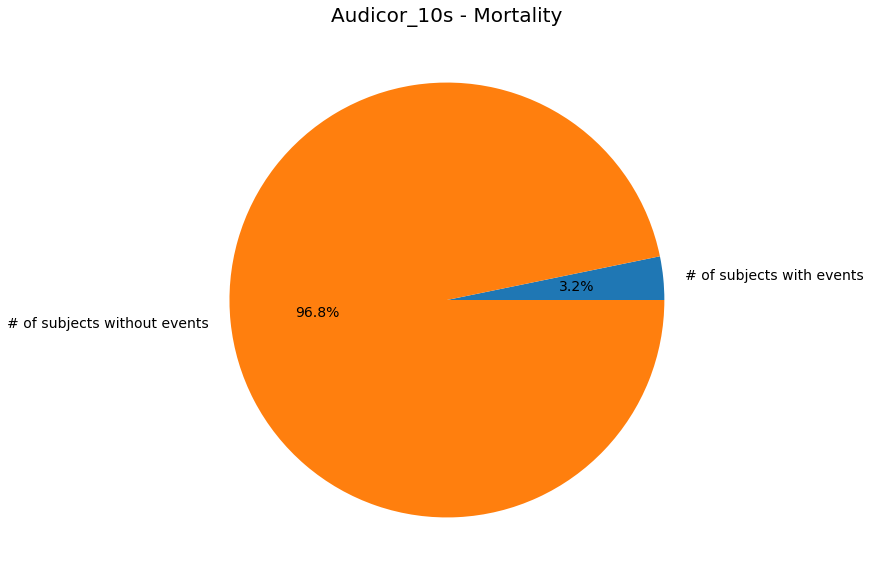

In [17]:
n_subject_with_event = (y[:, 1, 0] == 1).sum()
n_subject_without_event = y.shape[0] - n_subject_with_event
plot_pie('Audicor_10s - Mortality', 
            n_subject_with_event,
            n_subject_without_event)

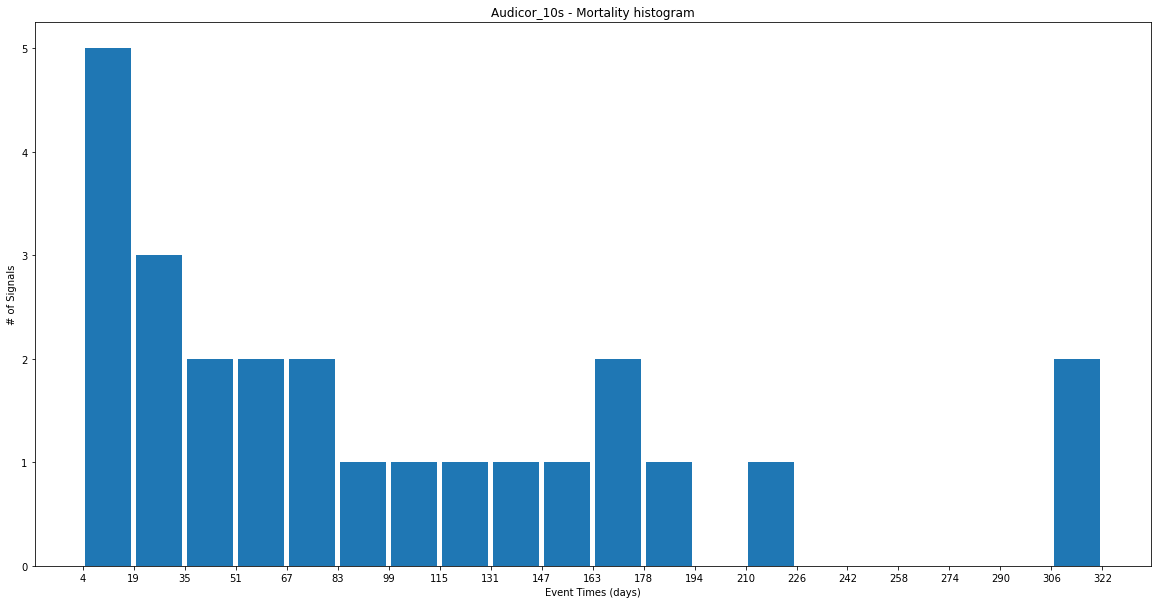

In [18]:
plot_hist('Audicor_10s - Mortality histogram', Mortality_survival_times)

# Hazard Labels

## Audicor_10s

### Get sex and age

In [90]:
df = pd.read_excel('/home/toosyou/Cardiology/audicor_10s/labels/HF01. Demongraphy.xlsx', skiprows=[0, 1, 3])
df.head()

Subject ID  Visit Date               Test/Battery  Order Filled Out Version  \
0  TVGH_TEST  2018/07/26  TEST:HF01. Demongraphy-v1                 1      v1   
1   SHH_TEST  2019/04/16  TEST:HF01. Demongraphy-v1                 1      v1   
2    FEMH024  2019/11/11  TEST:HF01. Demongraphy-v1                 1      v1   
3    KMUH012  2019/06/28  TEST:HF01. Demongraphy-v1                 1      v1   
4    TVGH070  2019/10/26  TEST:HF01. Demongraphy-v1                 1      v1   

   Study_hospital Study_SubjectID   Study_ICF  Study_visit Study_visit_DT  \
0             1.0       TVGH_TEST  07/23/2018          888     07/26/2018   
1             NaN        SHH_TEST         NaN          888            NaN   
2             3.0         FEMH024  11/21/2019          888     11/11/2019   
3             7.0         KMUH012  06/28/2019          888     06/28/2019   
4             1.0         TVGH070  10/31/2019          888     10/31/2019   

   ... Study_others1  Study_others1_DT  Study_others2  Study_others2_DT  \
0  ...           NaN               NaN            NaN               NaN   
1  ...           NaN               NaN            NaN               NaN   
2  ...           NaN               NaN            NaN               NaN   
3  ...           NaN               NaN            NaN               NaN   
4  ...           NaN               NaN            NaN               NaN   

  Study_others3  Study_others3_DT  Study_others4  Study_others4_DT  \
0           NaN               NaN            NaN               NaN   
1           NaN               NaN            NaN               NaN   
2           NaN               NaN            NaN               NaN   
3           NaN               NaN            NaN               NaN   
4           NaN               NaN            NaN               NaN   

  Study_others5  Study_others5_DT  
0           NaN               NaN  
1           NaN               NaN  
2           NaN               NaN  
3           NaN               NaN  
4           NaN               NaN  

[5 rows x 53 columns]

In [91]:
abnormal_event = pd.read_csv('./data/audicor_10s/abnormal_event.csv')
abnormal_event

filename measurement_date subject_id  \
0    FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001   
1           FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001   
2           FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001   
3           FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001   
4           FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001   
..                              ...              ...        ...   
654  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
655         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
656         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
657          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
658          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0       2019/10/30         []      NaN            NaN                 343   
1       2019/10/30         []      NaN            NaN                 342   
2       2019/10/30         []      NaN            NaN                 337   
3       2019/10/30         []      NaN            NaN                 288   
4       2019/10/30         []      NaN            NaN                 168   
..             ...        ...      ...            ...                 ...   
654     2019/12/17         []      NaN            NaN                  18   
655     2019/12/17         []      NaN            NaN                  12   
656     2019/12/17         []      NaN            NaN                   0   
657     2019/08/13         []      NaN            NaN                  14   
658     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                        0                343                     0   
1                        0                342                     0   
2                        0                337                     0   
3                        0                288                     0   
4                        0                168                     0   
..                     ...                ...                   ...   
654                      0                 18                     0   
655                      0                 12                     0   
656                      0                  0                     0   
657                      0                 14                     0   
658                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  
0                        343                           0  
1                        342                           0  
2                        337                           0  
3                        288                           0  
4                        168                           0  
..                       ...                         ...  
654                       18                           0  
655                       12                           0  
656                        0                           0  
657                       14                           0  
658                        0                           0  

[659 rows x 13 columns]

In [92]:
abnormal_event = abnormal_event.merge(df[['Subject ID', 'Study_sex', 'Study_BD']], left_on='subject_id', right_on='Subject ID', how='left')
abnormal_event = abnormal_event.rename(columns={
                    'Study_sex': 'sex',
                    'Study_BD': 'birthday'
}).drop('Subject ID', axis=1)
abnormal_event

filename measurement_date subject_id  \
0    FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001   
1           FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001   
2           FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001   
3           FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001   
4           FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001   
..                              ...              ...        ...   
654  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
655         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
656         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
657          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
658          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0       2019/10/30         []      NaN            NaN                 343   
1       2019/10/30         []      NaN            NaN                 342   
2       2019/10/30         []      NaN            NaN                 337   
3       2019/10/30         []      NaN            NaN                 288   
4       2019/10/30         []      NaN            NaN                 168   
..             ...        ...      ...            ...                 ...   
654     2019/12/17         []      NaN            NaN                  18   
655     2019/12/17         []      NaN            NaN                  12   
656     2019/12/17         []      NaN            NaN                   0   
657     2019/08/13         []      NaN            NaN                  14   
658     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                        0                343                     0   
1                        0                342                     0   
2                        0                337                     0   
3                        0                288                     0   
4                        0                168                     0   
..                     ...                ...                   ...   
654                      0                 18                     0   
655                      0                 12                     0   
656                      0                  0                     0   
657                      0                 14                     0   
658                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  
0                        343                           0  1.0  09/05/1958  
1                        342                           0  1.0  09/05/1958  
2                        337                           0  1.0  09/05/1958  
3                        288                           0  1.0  09/05/1958  
4                        168                           0  1.0  09/05/1958  
..                       ...                         ...  ...         ...  
654                       18                           0  0.0  03/19/1949  
655                       12                           0  0.0  03/19/1949  
656                        0                           0  0.0  03/19/1949  
657                       14                           0  NaN         NaN  
658                        0                           0  NaN         NaN  

[659 rows x 15 columns]

In [93]:
# calculate age
def cal_age(row):
    def isnan(X):
        return X != X
    if not isnan(row.measurement_date) and not isnan(row.birthday):
        return (datetime.strptime(row.measurement_date, '%Y/%m/%d') - datetime.strptime(row.birthday, '%m/%d/%Y')).days // 365
    return np.nan

abnormal_event.loc[321, 'birthday'] = '12/01/1928'
abnormal_event['age'] = abnormal_event.apply(cal_age, axis=1)
abnormal_event

filename measurement_date subject_id  \
0    FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001   
1           FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001   
2           FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001   
3           FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001   
4           FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001   
..                              ...              ...        ...   
654  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
655         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
656         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
657          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
658          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0       2019/10/30         []      NaN            NaN                 343   
1       2019/10/30         []      NaN            NaN                 342   
2       2019/10/30         []      NaN            NaN                 337   
3       2019/10/30         []      NaN            NaN                 288   
4       2019/10/30         []      NaN            NaN                 168   
..             ...        ...      ...            ...                 ...   
654     2019/12/17         []      NaN            NaN                  18   
655     2019/12/17         []      NaN            NaN                  12   
656     2019/12/17         []      NaN            NaN                   0   
657     2019/08/13         []      NaN            NaN                  14   
658     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                        0                343                     0   
1                        0                342                     0   
2                        0                337                     0   
3                        0                288                     0   
4                        0                168                     0   
..                     ...                ...                   ...   
654                      0                 18                     0   
655                      0                 12                     0   
656                      0                  0                     0   
657                      0                 14                     0   
658                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
0                        343                           0  1.0  09/05/1958   
1                        342                           0  1.0  09/05/1958   
2                        337                           0  1.0  09/05/1958   
3                        288                           0  1.0  09/05/1958   
4                        168                           0  1.0  09/05/1958   
..                       ...                         ...  ...         ...   
654                       18                           0  0.0  03/19/1949   
655                       12                           0  0.0  03/19/1949   
656                        0                           0  0.0  03/19/1949   
657                       14                           0  NaN         NaN   
658                        0                           0  NaN         NaN   

      age  
0    60.0  
1    60.0  
2    60.0  
3    60.0  
4    60.0  
..    ...  
654  70.0  
655  70.0  
656  70.0  
657   NaN  
658   NaN  

[659 rows x 16 columns]

In [94]:
abnormal_event[abnormal_event.age == abnormal_event.age.max()]

filename measurement_date subject_id  \
449  TVGH021_SCREENING_Snapshot.txt       2019/01/31    TVGH021   
450         TVGH021_V0_Snapshot.txt       2019/02/01    TVGH021   
451         TVGH021_V1_Snapshot.txt       2019/03/18    TVGH021   
452         TVGH021_V2_Snapshot.txt       2019/04/22    TVGH021   
453         TVGH021_V3_Snapshot.txt       2019/07/15    TVGH021   
454         TVGH021_V4_Snapshot.txt       2019/09/09    TVGH021   
455         TVGH021_V5_Snapshot.txt       2019/12/02    TVGH021   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
449     2019/12/02         []      NaN            NaN                 305   
450     2019/12/02         []      NaN            NaN                 304   
451     2019/12/02         []      NaN            NaN                 259   
452     2019/12/02         []      NaN            NaN                 224   
453     2019/12/02         []      NaN            NaN                 140   
454     2019/12/02         []      NaN            NaN                  84   
455     2019/12/02         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
449                      0                305                     0   
450                      0                304                     0   
451                      0                259                     0   
452                      0                224                     0   
453                      0                140                     0   
454                      0                 84                     0   
455                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
449                      305                           0  0.0  01/01/1918   
450                      304                           0  0.0  01/01/1918   
451                      259                           0  0.0  01/01/1918   
452                      224                           0  0.0  01/01/1918   
453                      140                           0  0.0  01/01/1918   
454                       84                           0  0.0  01/01/1918   
455                        0                           0  0.0  01/01/1918   

       age  
449  101.0  
450  101.0  
451  101.0  
452  101.0  
453  101.0  
454  101.0  
455  101.0

Text(0, 0.5, 'survival time(days)')

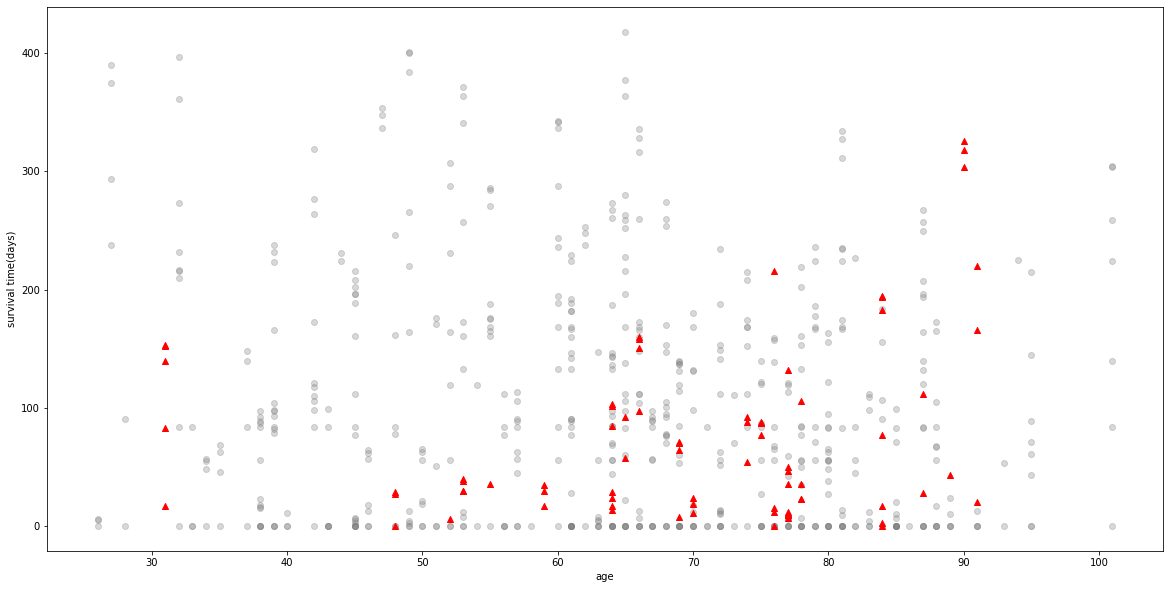

In [95]:
event_mask = (abnormal_event.ADHF_censoring_status == 1)
plt.figure(figsize=(20, 10))
plt.scatter(abnormal_event.age[~event_mask], abnormal_event.ADHF_survival_time[~event_mask], marker='o', color='grey', alpha=0.3)
plt.scatter(abnormal_event.age[event_mask], abnormal_event.ADHF_survival_time[event_mask], marker='^', color='red')
plt.xlabel('age')
plt.ylabel('survival time(days)')

### Get height and weight

In [96]:
df = pd.read_excel('/home/toosyou/Cardiology/audicor_10s/labels/HF04. Height and Weight.xlsx', skiprows=[0, 1, 3])
df

Subject ID  Visit Date                     Test/Battery  \
0        FEMH024  2019/11/21  TEST:HF04. Height and Weight-v1   
1        FEMH024  2019/11/11  TEST:HF04. Height and Weight-v1   
2        KMUH012  2019/06/28  TEST:HF04. Height and Weight-v1   
3        TVGH070  2019/10/26  TEST:HF04. Height and Weight-v1   
4        TVGH070  2019/10/31  TEST:HF04. Height and Weight-v1   
..           ...         ...                              ...   
801      KVGH014  2019/10/02  TEST:HF04. Height and Weight-v1   
802  WFH_test002  2019/04/30  TEST:HF04. Height and Weight-v1   
803       SHH003  2019/06/13  TEST:HF04. Height and Weight-v1   
804       SHH003  2019/06/19  TEST:HF04. Height and Weight-v1   
805       SHH003  2019/06/27  TEST:HF04. Height and Weight-v1   

     Order Filled Out Version  High_Weight_Hospital  High_Weight_visit  \
0                   1      v1                     3                  0   
1                   1      v1                     3                888   
2                   1      v1                     7                888   
3                   1      v1                     1                888   
4                   1      v1                     1                  0   
..                ...     ...                   ...                ...   
801                 1      v1                     8                  1   
802                 1      v1                     5                888   
803                 1      v1                     4                888   
804                 1      v1                     4                  0   
805                 1      v1                     4                  1   

    High_Weight_visit_DT  High_Weight_revisit  Height_Weight_Height_NA  \
0             11/21/2019                    0                        1   
1             11/11/2019                    0                        1   
2             06/28/2019                    0                        1   
3             10/28/2019                    0                        1   
4             11/01/2019                    0                        1   
..                   ...                  ...                      ...   
801           10/02/2019                    0                        1   
802           04/30/2019                    0                        1   
803           06/19/2019                    0                        1   
804           06/19/2019                    0                        1   
805           06/27/2019                    1                        1   

     Height_Weight_Height  Height_Weight_Weight_NA  Height_Weight_Weight  \
0                   177.0                        1                  86.2   
1                   177.0                        1                  86.2   
2                   163.0                        1                  66.1   
3                   150.0                        1                  49.5   
4                   150.0                        1                  48.3   
..                    ...                      ...                   ...   
801                 160.0                        1                  56.6   
802                 155.0                        1                  55.0   
803                 169.0                        1                  77.0   
804                 169.0                        1                  75.5   
805                 169.0                        1                  71.0   

    Height_Weight_BMI  
0             27.5144  
1             27.5144  
2             24.8786  
3                  22  
4             21.4667  
..                ...  
801           22.1094  
802               NIL  
803           26.9598  
804           26.4346  
805           24.8591  

[806 rows x 14 columns]

In [97]:
df['filename'] = df.apply(lambda row: row['Subject ID'] + ('_SCREENING_Snapshot.txt' if row['High_Weight_visit'] == 888 else '_V{:d}_Snapshot.txt'.format(row['High_Weight_visit'])), axis=1)
df

Subject ID  Visit Date                     Test/Battery  \
0        FEMH024  2019/11/21  TEST:HF04. Height and Weight-v1   
1        FEMH024  2019/11/11  TEST:HF04. Height and Weight-v1   
2        KMUH012  2019/06/28  TEST:HF04. Height and Weight-v1   
3        TVGH070  2019/10/26  TEST:HF04. Height and Weight-v1   
4        TVGH070  2019/10/31  TEST:HF04. Height and Weight-v1   
..           ...         ...                              ...   
801      KVGH014  2019/10/02  TEST:HF04. Height and Weight-v1   
802  WFH_test002  2019/04/30  TEST:HF04. Height and Weight-v1   
803       SHH003  2019/06/13  TEST:HF04. Height and Weight-v1   
804       SHH003  2019/06/19  TEST:HF04. Height and Weight-v1   
805       SHH003  2019/06/27  TEST:HF04. Height and Weight-v1   

     Order Filled Out Version  High_Weight_Hospital  High_Weight_visit  \
0                   1      v1                     3                  0   
1                   1      v1                     3                888   
2                   1      v1                     7                888   
3                   1      v1                     1                888   
4                   1      v1                     1                  0   
..                ...     ...                   ...                ...   
801                 1      v1                     8                  1   
802                 1      v1                     5                888   
803                 1      v1                     4                888   
804                 1      v1                     4                  0   
805                 1      v1                     4                  1   

    High_Weight_visit_DT  High_Weight_revisit  Height_Weight_Height_NA  \
0             11/21/2019                    0                        1   
1             11/11/2019                    0                        1   
2             06/28/2019                    0                        1   
3             10/28/2019                    0                        1   
4             11/01/2019                    0                        1   
..                   ...                  ...                      ...   
801           10/02/2019                    0                        1   
802           04/30/2019                    0                        1   
803           06/19/2019                    0                        1   
804           06/19/2019                    0                        1   
805           06/27/2019                    1                        1   

     Height_Weight_Height  Height_Weight_Weight_NA  Height_Weight_Weight  \
0                   177.0                        1                  86.2   
1                   177.0                        1                  86.2   
2                   163.0                        1                  66.1   
3                   150.0                        1                  49.5   
4                   150.0                        1                  48.3   
..                    ...                      ...                   ...   
801                 160.0                        1                  56.6   
802                 155.0                        1                  55.0   
803                 169.0                        1                  77.0   
804                 169.0                        1                  75.5   
805                 169.0                        1                  71.0   

    Height_Weight_BMI                            filename  
0             27.5144             FEMH024_V0_Snapshot.txt  
1             27.5144      FEMH024_SCREENING_Snapshot.txt  
2             24.8786      KMUH012_SCREENING_Snapshot.txt  
3                  22      TVGH070_SCREENING_Snapshot.txt  
4             21.4667             TVGH070_V0_Snapshot.txt  
..                ...                                 ...  
801           22.1094             KVGH014_V1_Snapshot.txt  
802               NIL  WFH_test002_SCREENING_Snapshot.

In [98]:
abnormal_event = abnormal_event.merge(df[['filename', 'Height_Weight_Height', 'Height_Weight_Weight', 'Height_Weight_BMI']], left_on='filename', right_on='filename', how='left')
abnormal_event

filename measurement_date subject_id  \
0    FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001   
1           FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001   
2           FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001   
3           FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001   
4           FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001   
..                              ...              ...        ...   
660  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
661         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
662         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
663          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
664          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0       2019/10/30         []      NaN            NaN                 343   
1       2019/10/30         []      NaN            NaN                 342   
2       2019/10/30         []      NaN            NaN                 337   
3       2019/10/30         []      NaN            NaN                 288   
4       2019/10/30         []      NaN            NaN                 168   
..             ...        ...      ...            ...                 ...   
660     2019/12/17         []      NaN            NaN                  18   
661     2019/12/17         []      NaN            NaN                  12   
662     2019/12/17         []      NaN            NaN                   0   
663     2019/08/13         []      NaN            NaN                  14   
664     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                        0                343                     0   
1                        0                342                     0   
2                        0                337                     0   
3                        0                288                     0   
4                        0                168                     0   
..                     ...                ...                   ...   
660                      0                 18                     0   
661                      0                 12                     0   
662                      0                  0                     0   
663                      0                 14                     0   
664                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
0                        343                           0  1.0  09/05/1958   
1                        342                           0  1.0  09/05/1958   
2                        337                           0  1.0  09/05/1958   
3                        288                           0  1.0  09/05/1958   
4                        168                           0  1.0  09/05/1958   
..                       ...                         ...  ...         ...   
660                       18                           0  0.0  03/19/1949   
661                       12                           0  0.0  03/19/1949   
662                        0                           0  0.0  03/19/1949   
663                       14                           0  NaN         NaN   
664                        0                           0  NaN         NaN   

      age  Height_Weight_Height  Height_Weight_Weight Height_Weight_BMI  
0    60.0                 147.5                  64.3           29.5547  
1    60.0                 147.0                  61.1           28.2753  
2    60.0                 147.0                  61.1           28.2753  
3    60.0                 147.0                  61.1           28.2753  
4    60.0                 146.5                  64.0           29.8198  
..    ...                   ...                   ...               ...  
6

In [99]:
# replace NIL with nan
abnormal_event.Height_Weight_BMI = abnormal_event.Height_Weight_BMI.replace('NIL', np.nan)
abnormal_event.head(10)

filename measurement_date subject_id follow_up_date  \
0  FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001     2019/10/30   
1         FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001     2019/10/30   
2         FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001     2019/10/30   
3         FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001     2019/10/30   
4         FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001     2019/10/30   
5         FEMH001_V4_Snapshot.txt       2019/08/07    FEMH001     2019/10/30   
6         FEMH001_V5_Snapshot.txt       2019/10/30    FEMH001     2019/10/30   
7  FEMH002_SCREENING_Snapshot.txt       2018/12/26    FEMH002     2019/12/04   
8         FEMH002_V0_Snapshot.txt       2018/12/28    FEMH002     2019/12/04   
9         FEMH002_V1_Snapshot.txt       2019/01/04    FEMH002     2019/12/04   

       ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0              []      NaN            NaN                 343   
1              []      NaN            NaN                 342   
2              []      NaN            NaN                 337   
3              []      NaN            NaN                 288   
4              []      NaN            NaN                 168   
5              []      NaN            NaN                  84   
6              []      NaN            NaN                   0   
7  ['06/04/2019']      NaN            NaN                 160   
8  ['06/04/2019']      NaN            NaN                 158   
9  ['06/04/2019']      NaN            NaN                 151   

   ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                      0                343                     0   
1                      0                342                     0   
2                      0                337                     0   
3                      0                288                     0   
4                      0                168                     0   
5                      0                 84                     0   
6                      0                  0                     0   
7                      1                343                     0   
8                      1                341                     0   
9                      1                334                     0   

   Mortality_survival_time  Mortality_censoring_status  sex    birthday   age  \
0                      343                           0  1.0  09/05/1958  60.0   
1                      342                           0  1.0  09/05/1958  60.0   
2                      337                           0  1.0  09/05/1958  60.0   
3                      288                           0  1.0  09/05/1958  60.0   
4                      168                           0  1.0  09/05/1958  60.0   
5                       84                           0  1.0  09/05/1958  60.0   
6                        0                           0  1.0  09/05/1958  61.0   
7                      343                           0  0.0  11/20/1952  66.0   
8                      341                           0  0.0  11/20/1952  66.0   
9                      334                           0  0.0  11/20/1952  66.0   

   Height_Weight_Height  Height_Weight_Weight  Height_Weight_BMI  
0                 147.5                  64.3            29.5547  
1                 147.0                  61.1            28.2753  
2                 147.0                  61.1            28.2753  
3                 147.0                  61.1            28.2753  
4                 146.5                  64.0            29.8198  
5                 147.0                  63.6            29.4322  
6                 146.5                  66.5            30.9846  
7                 164.0                  74.6            27.7365  
8                 164.0                  74.0            27.5134  
9                 164.0                  75.0            27.8852

In [100]:
abnormal_event[abnormal_event.subject_id.isin(abnormal_event[abnormal_event.Height_Weight_BMI.isnull()].subject_id.unique())]

filename measurement_date subject_id  \
25          FEMH005_V0_Snapshot.txt       2019/03/27    FEMH005   
26          FEMH005_V1_Snapshot.txt       2019/04/04    FEMH005   
27          FEMH005_V2_Snapshot.txt       2019/07/16    FEMH005   
28          FEMH005_V3_Snapshot.txt       2019/10/29    FEMH005   
29          FEMH005_V4_Snapshot.txt       2019/11/26    FEMH005   
..                              ...              ...        ...   
660  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
661         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
662         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
663          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
664          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
25      2019/11/26         []      NaN            NaN                 244   
26      2019/11/26         []      NaN            NaN                 236   
27      2019/11/26         []      NaN            NaN                 133   
28      2019/11/26         []      NaN            NaN                  28   
29      2019/11/26         []      NaN            NaN                   0   
..             ...        ...      ...            ...                 ...   
660     2019/12/17         []      NaN            NaN                  18   
661     2019/12/17         []      NaN            NaN                  12   
662     2019/12/17         []      NaN            NaN                   0   
663     2019/08/13         []      NaN            NaN                  14   
664     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
25                       0                244                     0   
26                       0                236                     0   
27                       0                133                     0   
28                       0                 28                     0   
29                       0                  0                     0   
..                     ...                ...                   ...   
660                      0                 18                     0   
661                      0                 12                     0   
662                      0                  0                     0   
663                      0                 14                     0   
664                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
25                       244                           0  0.0  08/15/1958   
26                       236                           0  0.0  08/15/1958   
27                       133                           0  0.0  08/15/1958   
28                        28                           0  0.0  08/15/1958   
29                         0                           0  0.0  08/15/1958   
..                       ...                         ...  ...         ...   
660                       18                           0  0.0  03/19/1949   
661                       12                           0  0.0  03/19/1949   
662                        0                           0  0.0  03/19/1949   
663                       14                           0  NaN         NaN   
664                        0                           0  NaN         NaN   

      age  Height_Weight_Height  Height_Weight_Weight  Height_Weight_BMI  
25   60.0                 157.0                  60.0            24.3418  
26   60.0                   NaN                   NaN                NaN  
27   60.0                 155.5                  60.1            24.8550  
28   61.0                 155.5                  60.1            24.8550  
29   61.0                 155.5                  61.5            25.4340  
..    ...                   ...                   ...                

In [101]:
# rename columns
abnormal_event = abnormal_event.rename(columns={
    'Height_Weight_Height': 'height',
    'Height_Weight_Weight': 'weight',
    'Height_Weight_BMI': 'BMI'
})
abnormal_event

filename measurement_date subject_id  \
0    FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001   
1           FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001   
2           FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001   
3           FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001   
4           FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001   
..                              ...              ...        ...   
660  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
661         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
662         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
663          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
664          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0       2019/10/30         []      NaN            NaN                 343   
1       2019/10/30         []      NaN            NaN                 342   
2       2019/10/30         []      NaN            NaN                 337   
3       2019/10/30         []      NaN            NaN                 288   
4       2019/10/30         []      NaN            NaN                 168   
..             ...        ...      ...            ...                 ...   
660     2019/12/17         []      NaN            NaN                  18   
661     2019/12/17         []      NaN            NaN                  12   
662     2019/12/17         []      NaN            NaN                   0   
663     2019/08/13         []      NaN            NaN                  14   
664     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                        0                343                     0   
1                        0                342                     0   
2                        0                337                     0   
3                        0                288                     0   
4                        0                168                     0   
..                     ...                ...                   ...   
660                      0                 18                     0   
661                      0                 12                     0   
662                      0                  0                     0   
663                      0                 14                     0   
664                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
0                        343                           0  1.0  09/05/1958   
1                        342                           0  1.0  09/05/1958   
2                        337                           0  1.0  09/05/1958   
3                        288                           0  1.0  09/05/1958   
4                        168                           0  1.0  09/05/1958   
..                       ...                         ...  ...         ...   
660                       18                           0  0.0  03/19/1949   
661                       12                           0  0.0  03/19/1949   
662                        0                           0  0.0  03/19/1949   
663                       14                           0  NaN         NaN   
664                        0                           0  NaN         NaN   

      age  height  weight      BMI  
0    60.0   147.5    64.3  29.5547  
1    60.0   147.0    61.1  28.2753  
2    60.0   147.0    61.1  28.2753  
3    60.0   147.0    61.1  28.2753  
4    60.0   146.5    64.0  29.8198  
..    ...     ...     ...      ...  
660  70.0   161.0    66.0  25.4620  
661  70.0   161.0    65.1  25.1148  
662  70.0     NaN     NaN      NaN  
663   NaN   165.0    83.3  30.5969  
664   NaN     NaN    78.9      NaN  

[665 rows x 19 columns]

### Deal with missing values

In [102]:
abnormal_event[abnormal_event[['sex', 'birthday', 'age']].isnull().any(axis=1)]

filename measurement_date subject_id follow_up_date  \
267  KVGH008_V0_Snapshot.txt       2019/06/14    KVGH008     2019/10/16   
268  KVGH008_V1_Snapshot.txt       2019/06/26    KVGH008     2019/10/16   
269  KVGH008_V2_Snapshot.txt       2019/10/16    KVGH008     2019/10/16   
663   WFH001_V0_Snapshot.txt       2019/07/30     WFH001     2019/08/13   
664   WFH001_V1_Snapshot.txt       2019/08/13     WFH001     2019/08/13   

    ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
267         []      NaN            NaN                 124   
268         []      NaN            NaN                 112   
269         []      NaN            NaN                   0   
663         []      NaN            NaN                  14   
664         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
267                      0                124                     0   
268                      0                112                     0   
269                      0                  0                     0   
663                      0                 14                     0   
664                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex birthday  age  \
267                      124                           0  NaN      NaN  NaN   
268                      112                           0  NaN      NaN  NaN   
269                        0                           0  NaN      NaN  NaN   
663                       14                           0  NaN      NaN  NaN   
664                        0                           0  NaN      NaN  NaN   

     height  weight      BMI  
267   168.0    64.6  22.8883  
268   168.0    63.9  22.6403  
269   168.0    64.5  22.8529  
663   165.0    83.3  30.5969  
664     NaN    78.9      NaN

In [103]:
abnormal_event[abnormal_event[['height', 'weight', 'BMI']].isnull().any(axis=1)]

filename measurement_date subject_id follow_up_date  \
26   FEMH005_V1_Snapshot.txt       2019/04/04    FEMH005     2019/11/26   
59   FEMH012_V3_Snapshot.txt       2019/11/05    FEMH012     2019/11/05   
63   FEMH013_V3_Snapshot.txt       2019/12/02    FEMH013     2019/12/02   
98   KMUH001_V1_Snapshot.txt       2019/04/10    KMUH001     2019/12/20   
101  KMUH001_V4_Snapshot.txt       2019/12/20    KMUH001     2019/12/20   
..                       ...              ...        ...            ...   
644  TVGH070_V1_Snapshot.txt       2019/11/11    TVGH070     2019/11/11   
649  TVGH072_V1_Snapshot.txt       2019/11/19    TVGH072     2019/11/19   
659  TVGH076_V1_Snapshot.txt       2019/12/09    TVGH076     2019/12/09   
662  TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077     2019/12/17   
664   WFH001_V1_Snapshot.txt       2019/08/13     WFH001     2019/08/13   

    ADHF_dates    CVD_date Mortality_date  ADHF_survival_time  \
26          []         NaN            NaN                 236   
59          []  10/01/2019     10/01/2019                   0   
63          []         NaN            NaN                   0   
98          []         NaN            NaN                 254   
101         []         NaN            NaN                   0   
..         ...         ...            ...                 ...   
644         []         NaN            NaN                   0   
649         []         NaN            NaN                   0   
659         []         NaN            NaN                   0   
662         []         NaN            NaN                   0   
664         []         NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
26                       0                236                     0   
59                       0                  0                    -1   
63                       0                  0                     0   
98                       0                254                     0   
101                      0                  0                     0   
..                     ...                ...                   ...   
644                      0                  0                     0   
649                      0                  0                     0   
659                      0                  0                     0   
662                      0                  0                     0   
664                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
26                       236                           0  0.0  08/15/1958   
59                         0                          -1  0.0  02/20/1953   
63                         0                           0  0.0  07/06/1948   
98                       254                           0  1.0  08/24/1950   
101                        0                           0  1.0  08/24/1950   
..                       ...                         ...  ...         ...   
644                        0                           0  1.0  07/15/1936   
649                        0                           0  0.0  08/28/1966   
659                        0                           0  1.0  10/27/1934   
662                        0                           0  0.0  03/19/1949   
664                        0                           0  NaN         NaN   

      age  height  weight  BMI  
26   60.0     NaN     NaN  NaN  
59   66.0     NaN     NaN  NaN  
63   71.0     NaN     NaN  NaN  
98   68.0     NaN     NaN  NaN  
101  69.0     NaN     NaN  NaN  
..    ...     ...     ...  ...  
644  83.0     NaN     NaN  NaN  
649  53.0     NaN     NaN  NaN  
659  85.0     NaN     NaN  NaN  
662  70.0     NaN     NaN  NaN  
664   NaN     NaN    78.9  NaN  

[233 rows x 19 columns]

In [104]:
to_fix = ['height', 'weight']
def interpolation(row):
    def isnan(x):
        return x!=x
    
    def interp(A, B, alpha, beta):
        return A + (B-A) * (alpha / (alpha-beta))
            
    fixed = list()
    for fix in to_fix:
        if not isnan(row[fix]): # no need to fix
            continue
        
        # find the two closest points with the same subject id
        subject = abnormal_event[(abnormal_event.subject_id == row.subject_id) & 
                                (abnormal_event.filename != row.filename) &
                                (~abnormal_event[fix].isnull())]

        get_delta_time_fn = lambda md:(datetime.strptime(row.measurement_date, '%Y/%m/%d') - datetime.strptime(md, '%Y/%m/%d')).days
        delta_time = subject.measurement_date.apply(get_delta_time_fn).values
        
        left, right = [np.nan, -np.Inf], [np.nan, np.Inf]
        for i, dt in enumerate(delta_time):
            if dt <= 0 and dt > left[1]:
                left = i, dt
                
            if dt > 0 and dt < right[1]:
                right = i, dt
                
        if left[1] == -np.Inf and right[1] == np.Inf: # cannot do interpolation
            continue
        if left[1] == -np.Inf:
            row[fix] = subject.iloc[right[0]][fix]
            continue
        if right[1] == np.Inf:
            row[fix] = subject.iloc[left[0]][fix]
            continue
        
        closest_indices = np.abs(delta_time).argsort()[:2]
        closest_delta_time = delta_time[closest_indices]
        
        if closest_indices.shape[0] == 1:
            # append the closest point
            row[fix] = subject.iloc[closest_indices][fix].iloc[0]
            continue
        if closest_indices.shape[0] == 0:
            continue
        
        A = subject.iloc[left[0]][fix]
        B = subject.iloc[right[0]][fix]
        alpha, beta = left[1], right[1]
        row[fix] = interp(A, B, alpha, beta)
        
    return row

# drop dup filenames
abnormal_event.drop_duplicates(subset='filename', keep='first', inplace=True)
abnormal_event['missing'] = False
abnormal_event.loc[abnormal_event[to_fix].isnull().any(axis=1), 'missing'] = True
abnormal_event = abnormal_event.apply(interpolation, axis=1)
abnormal_event

filename measurement_date subject_id  \
0    FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001   
1           FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001   
2           FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001   
3           FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001   
4           FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001   
..                              ...              ...        ...   
660  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
661         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
662         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
663          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
664          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0       2019/10/30         []      NaN            NaN                 343   
1       2019/10/30         []      NaN            NaN                 342   
2       2019/10/30         []      NaN            NaN                 337   
3       2019/10/30         []      NaN            NaN                 288   
4       2019/10/30         []      NaN            NaN                 168   
..             ...        ...      ...            ...                 ...   
660     2019/12/17         []      NaN            NaN                  18   
661     2019/12/17         []      NaN            NaN                  12   
662     2019/12/17         []      NaN            NaN                   0   
663     2019/08/13         []      NaN            NaN                  14   
664     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                        0                343                     0   
1                        0                342                     0   
2                        0                337                     0   
3                        0                288                     0   
4                        0                168                     0   
..                     ...                ...                   ...   
660                      0                 18                     0   
661                      0                 12                     0   
662                      0                  0                     0   
663                      0                 14                     0   
664                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
0                        343                           0  1.0  09/05/1958   
1                        342                           0  1.0  09/05/1958   
2                        337                           0  1.0  09/05/1958   
3                        288                           0  1.0  09/05/1958   
4                        168                           0  1.0  09/05/1958   
..                       ...                         ...  ...         ...   
660                       18                           0  0.0  03/19/1949   
661                       12                           0  0.0  03/19/1949   
662                        0                           0  0.0  03/19/1949   
663                       14                           0  NaN         NaN   
664                        0                           0  NaN         NaN   

      age  height  weight      BMI  missing  
0    60.0   147.5    64.3  29.5547    False  
1    60.0   147.0    61.1  28.2753    False  
2    60.0   147.0    61.1  28.2753    False  
3    60.0   147.0    61.1  28.2753    False  
4    60.0   146.5    64.0  29.8198    False  
..    ...     ...     ...      ...      ...  
660  70.0   161.0    66.0  25.4620    False  
661  70.0   161.0    65.1  25.1148    False  
662  70.0   161.0    65.1      NaN     True  
663   NaN   165.0    83.3  30.5969    False  
664   NaN   1

In [105]:
# re-calculate BMI
abnormal_event['BMI'] = abnormal_event.weight / (abnormal_event.height**2 * 0.0001)
abnormal_event

filename measurement_date subject_id  \
0    FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001   
1           FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001   
2           FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001   
3           FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001   
4           FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001   
..                              ...              ...        ...   
660  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
661         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
662         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
663          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
664          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0       2019/10/30         []      NaN            NaN                 343   
1       2019/10/30         []      NaN            NaN                 342   
2       2019/10/30         []      NaN            NaN                 337   
3       2019/10/30         []      NaN            NaN                 288   
4       2019/10/30         []      NaN            NaN                 168   
..             ...        ...      ...            ...                 ...   
660     2019/12/17         []      NaN            NaN                  18   
661     2019/12/17         []      NaN            NaN                  12   
662     2019/12/17         []      NaN            NaN                   0   
663     2019/08/13         []      NaN            NaN                  14   
664     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                        0                343                     0   
1                        0                342                     0   
2                        0                337                     0   
3                        0                288                     0   
4                        0                168                     0   
..                     ...                ...                   ...   
660                      0                 18                     0   
661                      0                 12                     0   
662                      0                  0                     0   
663                      0                 14                     0   
664                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
0                        343                           0  1.0  09/05/1958   
1                        342                           0  1.0  09/05/1958   
2                        337                           0  1.0  09/05/1958   
3                        288                           0  1.0  09/05/1958   
4                        168                           0  1.0  09/05/1958   
..                       ...                         ...  ...         ...   
660                       18                           0  0.0  03/19/1949   
661                       12                           0  0.0  03/19/1949   
662                        0                           0  0.0  03/19/1949   
663                       14                           0  NaN         NaN   
664                        0                           0  NaN         NaN   

      age  height  weight        BMI  missing  
0    60.0   147.5    64.3  29.554726    False  
1    60.0   147.0    61.1  28.275256    False  
2    60.0   147.0    61.1  28.275256    False  
3    60.0   147.0    61.1  28.275256    False  
4    60.0   146.5    64.0  29.819800    False  
..    ...     ...     ...        ...      ...  
660  70.0   161.0    66.0  25.461981    False  
661  70.0   161.0    65.1  25.114772    False  
662  70.0   161.0    65.1  25.114772     True  
663   NaN   165.0    83.3  30.596878   

In [106]:
abnormal_event[abnormal_event.subject_id.isin(abnormal_event[(abnormal_event.missing == True)].subject_id.unique())][to_fix + ['filename', 'measurement_date', 'missing']].head(50)

height      weight                        filename measurement_date  \
25   157.000000   60.000000         FEMH005_V0_Snapshot.txt       2019/03/27   
26   156.891892   60.007207         FEMH005_V1_Snapshot.txt       2019/04/04   
27   155.500000   60.100000         FEMH005_V2_Snapshot.txt       2019/07/16   
28   155.500000   60.100000         FEMH005_V3_Snapshot.txt       2019/10/29   
29   155.500000   61.500000         FEMH005_V4_Snapshot.txt       2019/11/26   
55   174.000000  117.300000  FEMH012_SCREENING_Snapshot.txt       2019/05/16   
56   173.000000   97.100000         FEMH012_V0_Snapshot.txt       2019/05/23   
57   173.000000   97.000000         FEMH012_V1_Snapshot.txt       2019/05/29   
58   173.000000   97.100000         FEMH012_V2_Snapshot.txt       2019/07/24   
59   173.000000   97.100000         FEMH012_V3_Snapshot.txt       2019/11/05   
60   173.000000   58.600000  FEMH013_SCREENING_Snapshot.txt       2019/06/05   
61   173.000000   59.900000         FEMH013_V1_Snapshot.txt       2019/06/17   
62   173.000000   57.200000         FEMH013_V2_Snapshot.txt       2019/09/09   
63   173.000000   57.200000         FEMH013_V3_Snapshot.txt       2019/12/02   
96   145.000000   64.600000  KMUH001_SCREENING_Snapshot.txt       2019/03/21   
97   145.000000   62.100000         KMUH001_V0_Snapshot.txt       2019/04/04   
98   145.000000   62.160000         KMUH001_V1_Snapshot.txt       2019/04/10   
99   145.000000   63.000000         KMUH001_V2_Snapshot.txt       2019/07/03   
100  145.000000   64.500000         KMUH001_V3_Snapshot.txt       2019/08/28   
101  145.000000   64.500000         KMUH001_V4_Snapshot.txt       2019/12/20   
108  153.000000   67.600000  KMUH003_SCREENING_Snapshot.txt       2019/04/30   
109  153.000000   65.000000         KMUH003_V1_Snapshot.txt       2019/05/07   
110  153.000000   65.000000         KMUH003_V2_Snapshot.txt       2019/07/30   
111  153.000000   65.000000         KMUH003_V3_Snapshot.txt       2019/10/21   
112  167.000000   61.000000  KMUH004_SCREENING_Snapshot.txt       2019/05/07   
113  167.000000   59.300000         KMUH004_V0_Snapshot.txt       2019/05/10   
114  167.000000   59.000000         KMUH004_V1_Snapshot.txt       2019/05/20   
115  167.000000   61.799248         KMUH004_V2_Snapshot.txt       2019/08/01   
116  167.000000   64.100000         KMUH004_V3_Snapshot.txt       2019/09/30   
117  165.000000   75.000000  KMUH005_SCREENING_Snapshot.txt       2019/05/07   
118  165.000000   75.000000         KMUH005_V0_Snapshot.txt       2019/05/08   
119  165.000000   75.000000         KMUH005_V1_Snapshot.txt       2019/05/15   
120  165.000000   75.000000         KMUH005_V2_Snapshot.txt       2019/07/10   
121  165.000000   75.000000         KMUH005_V3_Snapshot.txt       2019/10/30   
122  157.000000   66.200000  KMUH006_SCREENING_Snapshot.txt       2019/05/16   
123  157.000000   66.300000         KMUH006_V0_Snapshot.txt       2019/05/17   
124  157.000000   66.300000         KMUH006_V1_Snapshot.txt       2019/05/30   
125  158.000000   91.300000  KMUH007_SCREENING_Snapshot.txt       2019/05/29   
126  157.931034   87.400000         KMUH007_V0_Snapshot.txt       2019/05/31   
127  157.000000   88.500000         KMUH007_V1_Snapshot.txt       2019/06/27   
128  157.000000   88.500000         KMUH007_V2_Snapshot.txt       2019/08/28   
129  157.000000   88.500000         KMUH007_V3_Snapshot.txt       2019/11/20   
130  155.000000   52.000000  KMUH008_SCREENING_Snapshot.txt       2019/06/11   
131  155.000000   52.000000         KMUH008_V0_Snapshot.txt       2019/06/12   
132  155.000000   52.000000         KMUH008_V1_Snapshot.txt       2019/06/19   
133  155.000000   52.000000         KMUH008_V2_Snapshot.txt       2019/08/29   
134  155.000000   52.000000         KMUH008_V3_Snapshot.txt       2019/11/26   
135  153.000000   66.500000  KMUH009_SCREENING_Snapshot.txt       2019/06/13   
136  153.000000   65.500000         KMUH009_V0_Snapshot.txt       2019/06/17   
137  153.

In [107]:
abnormal_event.drop(columns='missing', inplace=True)
abnormal_event

filename measurement_date subject_id  \
0    FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001   
1           FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001   
2           FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001   
3           FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001   
4           FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001   
..                              ...              ...        ...   
660  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
661         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
662         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
663          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
664          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0       2019/10/30         []      NaN            NaN                 343   
1       2019/10/30         []      NaN            NaN                 342   
2       2019/10/30         []      NaN            NaN                 337   
3       2019/10/30         []      NaN            NaN                 288   
4       2019/10/30         []      NaN            NaN                 168   
..             ...        ...      ...            ...                 ...   
660     2019/12/17         []      NaN            NaN                  18   
661     2019/12/17         []      NaN            NaN                  12   
662     2019/12/17         []      NaN            NaN                   0   
663     2019/08/13         []      NaN            NaN                  14   
664     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                        0                343                     0   
1                        0                342                     0   
2                        0                337                     0   
3                        0                288                     0   
4                        0                168                     0   
..                     ...                ...                   ...   
660                      0                 18                     0   
661                      0                 12                     0   
662                      0                  0                     0   
663                      0                 14                     0   
664                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
0                        343                           0  1.0  09/05/1958   
1                        342                           0  1.0  09/05/1958   
2                        337                           0  1.0  09/05/1958   
3                        288                           0  1.0  09/05/1958   
4                        168                           0  1.0  09/05/1958   
..                       ...                         ...  ...         ...   
660                       18                           0  0.0  03/19/1949   
661                       12                           0  0.0  03/19/1949   
662                        0                           0  0.0  03/19/1949   
663                       14                           0  NaN         NaN   
664                        0                           0  NaN         NaN   

      age  height  weight        BMI  
0    60.0   147.5    64.3  29.554726  
1    60.0   147.0    61.1  28.275256  
2    60.0   147.0    61.1  28.275256  
3    60.0   147.0    61.1  28.275256  
4    60.0   146.5    64.0  29.819800  
..    ...     ...     ...        ...  
660  70.0   161.0    66.0  25.461981  
661  70.0   161.0    65.1  25.114772  
662  70.0   161.0    65.1  25.114772  
663   NaN   165.0    83.3  30.596878  
664   NaN   165.0    78.9  28.980716  

[659 rows x 19 columns]

In [108]:
abnormal_event[abnormal_event[to_fix].isnull().any(axis=1)]

filename measurement_date subject_id follow_up_date  \
243  KMUH038_V1_Snapshot.txt       2020/01/03    KMUH038     2020/01/03   
298   SHH004_V1_Snapshot.txt       2019/07/02     SHH004     2019/12/07   
299   SHH004_V2_Snapshot.txt       2019/09/24     SHH004     2019/12/07   
300   SHH004_V3_Snapshot.txt       2019/12/07     SHH004     2019/12/07   
306   SHH007_V1_Snapshot.txt       2019/07/20     SHH007     2019/07/20   
323   SHH015_V2_Snapshot.txt       2019/11/14     SHH015     2019/11/14   
329   SHH020_V1_Snapshot.txt       2019/11/29     SHH020     2019/11/29   
330   SHH022_V1_Snapshot.txt       2019/11/29     SHH022     2019/11/29   
335   SHH028_V1_Snapshot.txt       2020/01/07     SHH028     2020/01/07   
642  TVGH069_V1_Snapshot.txt       2019/11/07    TVGH069     2019/12/30   
643  TVGH069_V2_Snapshot.txt       2019/12/30    TVGH069     2019/12/30   
644  TVGH070_V1_Snapshot.txt       2019/11/11    TVGH070     2019/11/11   

         ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
243              []      NaN            NaN                   0   
298  ['10/22/2019']      NaN            NaN                 112   
299  ['10/22/2019']      NaN            NaN                  28   
300  ['10/22/2019']      NaN            NaN                   0   
306              []      NaN            NaN                   0   
323  ['09/11/2019']      NaN            NaN                   0   
329  ['11/14/2019']      NaN            NaN                   0   
330              []      NaN            NaN                   0   
335              []      NaN            NaN                   0   
642              []      NaN            NaN                  53   
643              []      NaN            NaN                   0   
644              []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
243                      0                  0                     0   
298                      1                158                     0   
299                      1                 74                     0   
300                     -1                  0                     0   
306                      0                  0                     0   
323                     -1                  0                     0   
329                     -1                  0                     0   
330                      0                  0                     0   
335                      0                  0                     0   
642                      0                 53                     0   
643                      0                  0                     0   
644                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
243                        0                           0  1.0  07/16/1932   
298                      158                           0  0.0  06/07/1932   
299                       74                           0  0.0  06/07/1932   
300                        0                           0  0.0  06/07/1932   
306                        0                           0  1.0  02/02/1949   
323                        0                           0  0.0  12/01/1928   
329                        0                           0  1.0  01/29/1939   
330                        0                           0  1.0  04/23/1934   
335                        0                           0  1.0  12/22/1944   
642                       53                           0  0.0  07/09/1926   
643                        0                           0  0.0  07/09/1926   
644                        0                           0  1.0  07/15/1936   

      age  height  weight  BMI  
243  87.0   150.0     NaN  NaN  
298  87.0     NaN     NaN  NaN  
299  87.0     NaN     NaN  NaN  
300  87.0     NaN     NaN  NaN  
306  70.0     NaN     NaN  NaN  
323  91.0     NaN     NaN  NaN  
329  80.0     N

In [109]:
abnormal_event[abnormal_event.subject_id == 'KMUH025']

filename measurement_date subject_id  \
199  KMUH025_SCREENING_Snapshot.txt       2019/09/09    KMUH025   
201         KMUH025_V0_Snapshot.txt       2019/09/11    KMUH025   
202         KMUH025_V1_Snapshot.txt       2019/09/18    KMUH025   
203         KMUH025_V2_Snapshot.txt       2019/11/13    KMUH025   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
199     2019/11/13         []      NaN            NaN                  65   
201     2019/11/13         []      NaN            NaN                  63   
202     2019/11/13         []      NaN            NaN                  56   
203     2019/11/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
199                      0                 65                     0   
201                      0                 63                     0   
202                      0                 56                     0   
203                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
199                       65                           0  1.0  04/19/1939   
201                       63                           0  1.0  04/19/1939   
202                       56                           0  1.0  04/19/1939   
203                        0                           0  1.0  04/19/1939   

      age  height  weight        BMI  
199  80.0   147.0    44.1  20.408163  
201  80.0   147.0    44.1  20.408163  
202  80.0   147.0    44.1  20.408163  
203  80.0   145.0    44.1  20.975030

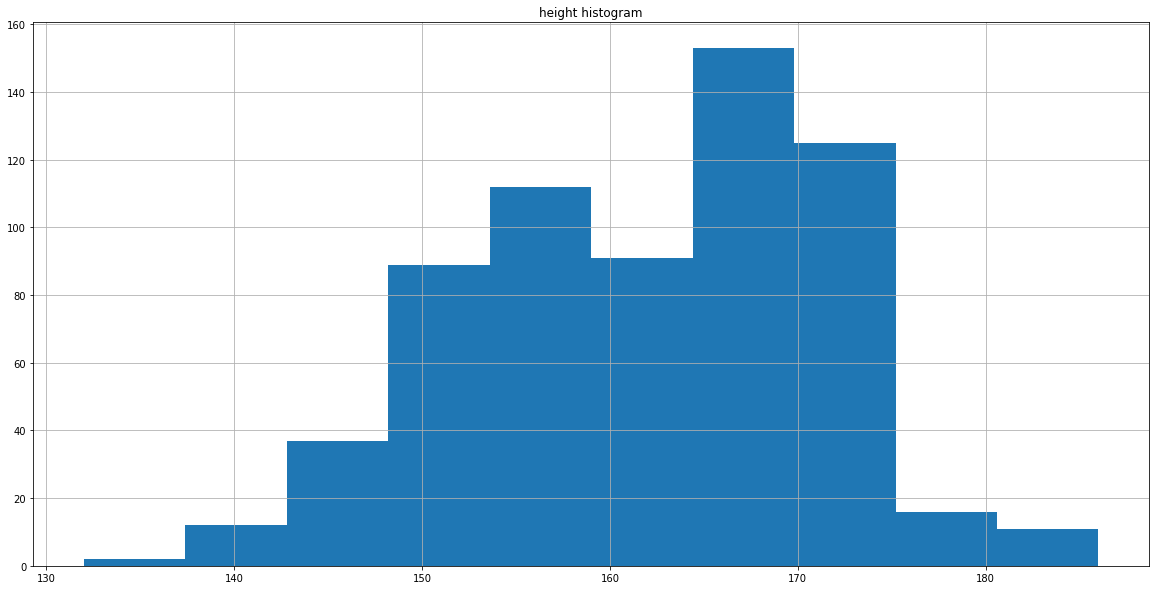

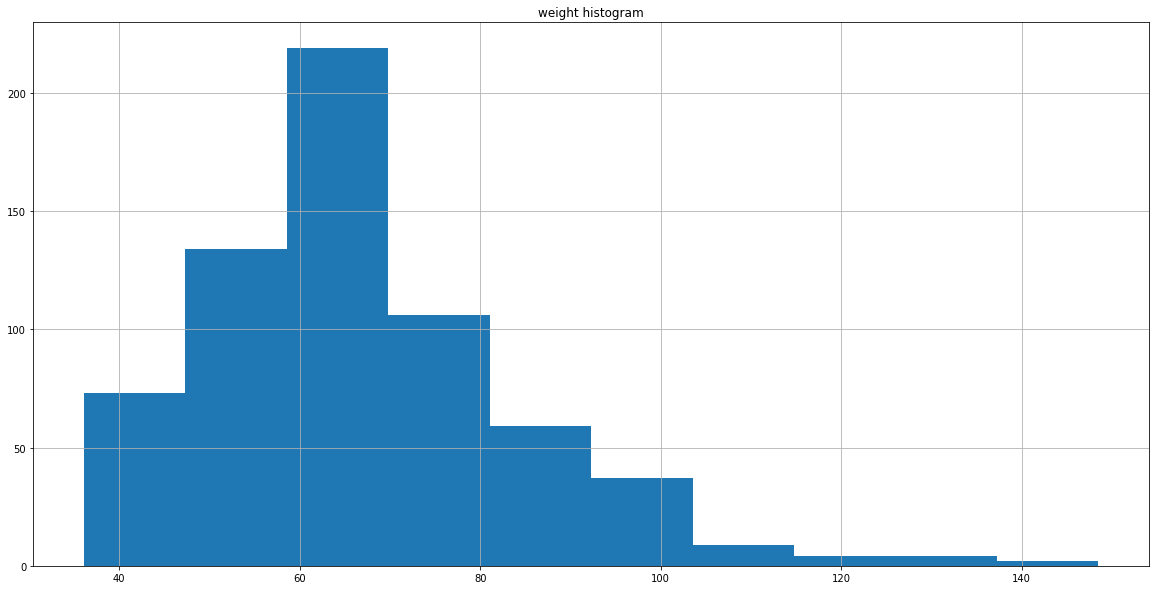

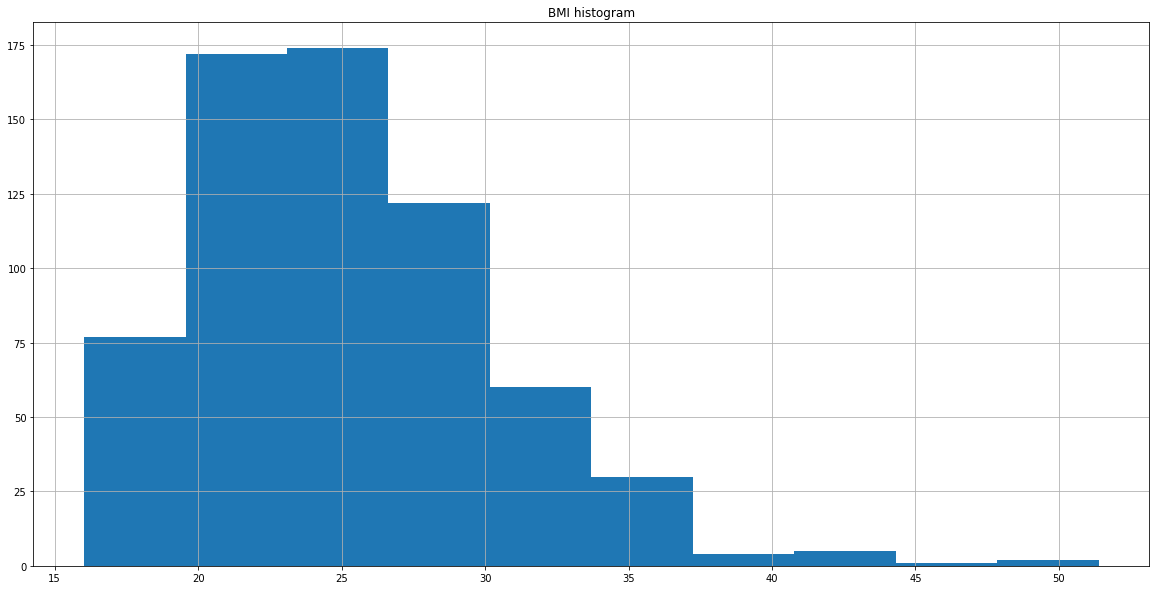

In [110]:
ax = abnormal_event.height.hist(figsize=(20, 10))
ax.set_title('height histogram')
plt.show()

ax = abnormal_event.weight.hist(figsize=(20, 10))
ax.set_title('weight histogram')
plt.show()

ax = abnormal_event.BMI.hist(figsize=(20, 10))
ax.set_title('BMI histogram')
plt.show()

In [111]:
abnormal_event[abnormal_event.subject_id.isin(abnormal_event[abnormal_event[to_fix].isnull().any(axis=1)].subject_id.unique())]

filename measurement_date subject_id follow_up_date  \
243  KMUH038_V1_Snapshot.txt       2020/01/03    KMUH038     2020/01/03   
298   SHH004_V1_Snapshot.txt       2019/07/02     SHH004     2019/12/07   
299   SHH004_V2_Snapshot.txt       2019/09/24     SHH004     2019/12/07   
300   SHH004_V3_Snapshot.txt       2019/12/07     SHH004     2019/12/07   
306   SHH007_V1_Snapshot.txt       2019/07/20     SHH007     2019/07/20   
323   SHH015_V2_Snapshot.txt       2019/11/14     SHH015     2019/11/14   
329   SHH020_V1_Snapshot.txt       2019/11/29     SHH020     2019/11/29   
330   SHH022_V1_Snapshot.txt       2019/11/29     SHH022     2019/11/29   
335   SHH028_V1_Snapshot.txt       2020/01/07     SHH028     2020/01/07   
642  TVGH069_V1_Snapshot.txt       2019/11/07    TVGH069     2019/12/30   
643  TVGH069_V2_Snapshot.txt       2019/12/30    TVGH069     2019/12/30   
644  TVGH070_V1_Snapshot.txt       2019/11/11    TVGH070     2019/11/11   

         ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
243              []      NaN            NaN                   0   
298  ['10/22/2019']      NaN            NaN                 112   
299  ['10/22/2019']      NaN            NaN                  28   
300  ['10/22/2019']      NaN            NaN                   0   
306              []      NaN            NaN                   0   
323  ['09/11/2019']      NaN            NaN                   0   
329  ['11/14/2019']      NaN            NaN                   0   
330              []      NaN            NaN                   0   
335              []      NaN            NaN                   0   
642              []      NaN            NaN                  53   
643              []      NaN            NaN                   0   
644              []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
243                      0                  0                     0   
298                      1                158                     0   
299                      1                 74                     0   
300                     -1                  0                     0   
306                      0                  0                     0   
323                     -1                  0                     0   
329                     -1                  0                     0   
330                      0                  0                     0   
335                      0                  0                     0   
642                      0                 53                     0   
643                      0                  0                     0   
644                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
243                        0                           0  1.0  07/16/1932   
298                      158                           0  0.0  06/07/1932   
299                       74                           0  0.0  06/07/1932   
300                        0                           0  0.0  06/07/1932   
306                        0                           0  1.0  02/02/1949   
323                        0                           0  0.0  12/01/1928   
329                        0                           0  1.0  01/29/1939   
330                        0                           0  1.0  04/23/1934   
335                        0                           0  1.0  12/22/1944   
642                       53                           0  0.0  07/09/1926   
643                        0                           0  0.0  07/09/1926   
644                        0                           0  1.0  07/15/1936   

      age  height  weight  BMI  
243  87.0   150.0     NaN  NaN  
298  87.0     NaN     NaN  NaN  
299  87.0     NaN     NaN  NaN  
300  87.0     NaN     NaN  NaN  
306  70.0     NaN     NaN  NaN  
323  91.0     NaN     NaN  NaN  
329  80.0     N

In [112]:
# output file
abnormal_event

filename measurement_date subject_id  \
0    FEMH001_SCREENING_Snapshot.txt       2018/11/21    FEMH001   
1           FEMH001_V0_Snapshot.txt       2018/11/22    FEMH001   
2           FEMH001_V1_Snapshot.txt       2018/11/27    FEMH001   
3           FEMH001_V2_Snapshot.txt       2019/01/15    FEMH001   
4           FEMH001_V3_Snapshot.txt       2019/05/15    FEMH001   
..                              ...              ...        ...   
660  TVGH077_SCREENING_Snapshot.txt       2019/11/29    TVGH077   
661         TVGH077_V0_Snapshot.txt       2019/12/05    TVGH077   
662         TVGH077_V1_Snapshot.txt       2019/12/17    TVGH077   
663          WFH001_V0_Snapshot.txt       2019/07/30     WFH001   
664          WFH001_V1_Snapshot.txt       2019/08/13     WFH001   

    follow_up_date ADHF_dates CVD_date Mortality_date  ADHF_survival_time  \
0       2019/10/30         []      NaN            NaN                 343   
1       2019/10/30         []      NaN            NaN                 342   
2       2019/10/30         []      NaN            NaN                 337   
3       2019/10/30         []      NaN            NaN                 288   
4       2019/10/30         []      NaN            NaN                 168   
..             ...        ...      ...            ...                 ...   
660     2019/12/17         []      NaN            NaN                  18   
661     2019/12/17         []      NaN            NaN                  12   
662     2019/12/17         []      NaN            NaN                   0   
663     2019/08/13         []      NaN            NaN                  14   
664     2019/08/13         []      NaN            NaN                   0   

     ADHF_censoring_status  CVD_survival_time  CVD_censoring_status  \
0                        0                343                     0   
1                        0                342                     0   
2                        0                337                     0   
3                        0                288                     0   
4                        0                168                     0   
..                     ...                ...                   ...   
660                      0                 18                     0   
661                      0                 12                     0   
662                      0                  0                     0   
663                      0                 14                     0   
664                      0                  0                     0   

     Mortality_survival_time  Mortality_censoring_status  sex    birthday  \
0                        343                           0  1.0  09/05/1958   
1                        342                           0  1.0  09/05/1958   
2                        337                           0  1.0  09/05/1958   
3                        288                           0  1.0  09/05/1958   
4                        168                           0  1.0  09/05/1958   
..                       ...                         ...  ...         ...   
660                       18                           0  0.0  03/19/1949   
661                       12                           0  0.0  03/19/1949   
662                        0                           0  0.0  03/19/1949   
663                       14                           0  NaN         NaN   
664                        0                           0  NaN         NaN   

      age  height  weight        BMI  
0    60.0   147.5    64.3  29.554726  
1    60.0   147.0    61.1  28.275256  
2    60.0   147.0    61.1  28.275256  
3    60.0   147.0    61.1  28.275256  
4    60.0   146.5    64.0  29.819800  
..    ...     ...     ...        ...  
660  70.0   161.0    66.0  25.461981  
661  70.0   161.0    65.1  25.114772  
662  70.0   161.0    65.1  25.114772  
663   NaN   165.0    83.3  30.596878  
664   NaN   165.0    78.9  28.980716  

[659 rows x 19 columns]

In [118]:
df = pd.read_excel('/home/toosyou/Cardiology/audicor_10s/labels/HF09. Laboratory.xlsx', skiprows=[0, 1, 3])
df[df.Lab_visit == 888].describe()

Order Filled Out  Lab_Hospital  Lab_visit  Lab_revisit      Hgb_NA  \
count             215.0    215.000000      215.0   215.000000  215.000000   
mean                1.0      3.851163      888.0     0.060465    0.972093   
std                 0.0      2.623792        0.0     0.238903    0.165091   
min                 1.0      1.000000      888.0     0.000000    0.000000   
25%                 1.0      1.000000      888.0     0.000000    1.000000   
50%                 1.0      4.000000      888.0     0.000000    1.000000   
75%                 1.0      7.000000      888.0     0.000000    1.000000   
max                 1.0      8.000000      888.0     1.000000    1.000000   

              Hgb      Hct_NA         Hct      RBC_NA         RBC  ...  \
count  208.000000  215.000000  179.000000  215.000000  176.000000  ...   
mean    12.834135    0.832558   38.633520    0.823256    4.353182  ...   
std      2.504940    0.374241    7.925566    0.382342    0.895815  ...   
min      7.200000    0.000000    4.400000    0.000000    2.020000  ...   
25%     11.400000    1.000000   34.000000    1.000000    3.760000  ...   
50%     12.850000    1.000000   38.900000    1.000000    4.375000  ...   
75%     14.625000    1.000000   44.250000    1.000000    5.022500  ...   
max     19.300000    1.000000   56.700000    1.000000    6.440000  ...   

       Lab_Uric_acid  Lab_TroponinI_NA  Lab_Troponin_T_NA  Lab_Troponin_T  \
count      60.000000        215.000000         215.000000       23.000000   
mean        8.381667          0.525581           0.106977      356.033913   
std         2.626365          0.500510           0.309805      726.453151   
min         3.500000          0.000000           0.000000        0.040000   
25%         6.300000          0.000000           0.000000       26.250000   
50%         8.450000          1.000000           0.000000       48.400000   
75%         9.825000          1.000000           0.000000       98.450000   
max        16.000000          1.000000           1.000000     2288.000000   

       Lab_hsCRP_NA  Lab_hsCRP  Lab_ST2_NA  Lab_ST2  Lab_BNP_NA       Lab_BNP  
count    215.000000   2.000000       215.0      0.0  205.000000     73.000000  
mean       0.009302   0.580000         0.0      NaN    0.356098   1761.115068  
std        0.096223   0.678823         0.0      NaN    0.480017   2554.593175  
min        0.000000   0.100000         0.0      NaN    0.000000     13.700000  
25%        0.000000   0.340000         0.0      NaN    0.000000    669.300000  
50%        0.000000   0.580000         0.0      NaN    0.000000   1020.000000  
75%        0.000000   0.820000         0.0      NaN    1.000000   1840.000000  
max        1.000000   1.060000         0.0      NaN    1.000000  16737.600000  

[8 rows x 79 columns]